### A document of prior mistakes made with Izh model

**Main Issue:** Incorrect for loop

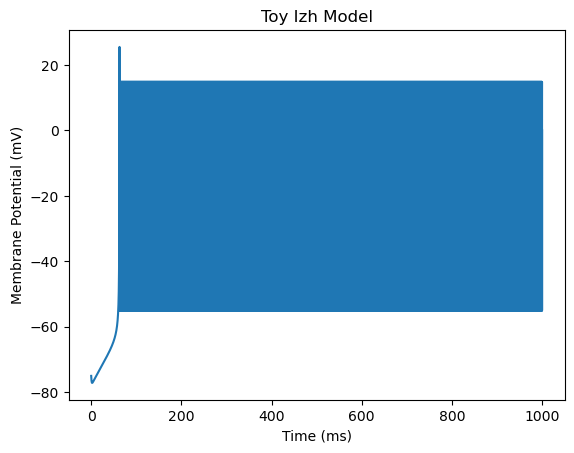

In [49]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Define functions
"""
Descr: dvdt is a function that computes the change in voltage over time, explained by the Izhikevich neuron model.

Eq: dvdt = 0.04*(v**2) + 5*v + 140 - u + I

Args: v, u, I
u --- membrane recovery variable
v --- membrane potential
I --- injected current

Returns: 0.04*(v**2) + 5*v + 140 - u + I
"""
def dvdt(v, u, I):
    return (0.04*(v**2) + 5*v + 140 - u + I)


"""
Descr: dudt is a function that computes the change in membrane recovery over time, explained by the Izhikevich neuron model.

Eq: dudt = a*(b*v - u)

Args: a, b, v, u
a --- time scale of recovery variable u. smaller values of a => slower recovery. typically a=0.02
b --- sensitivity of recovery variable u to subthreshold fluctuations of membrane potential v
v --- membrane potential
u --- membrane recovery variable

Returns:
"""
def dudt(a, b, v, u):
    return (a*(b*v - u))


# Define variables
I=3.7739109347     # injected current
a=0.02             # time scale of recovery variable u
b=0.2
c=-55               # mV
d=4
t_sim=1000          # simulation time
dt=0.1              # time step


# Initialize t, u, v arrays
t_values=np.arange(0, t_sim, dt)  # times
u_values=np.zeros(t_values.size)  # empty array of membrane recovery values
v_values=np.zeros(t_values.size)  # empty array of voltages
v_values[0]=-75                   # initial voltage (mV)
u_values[0]=1                     # initial membrane recovery value


# Build arrays of voltages and membrane recovery values.
for i in range(t_values.size - 1):

    if v_values[i]>=30:                # if v>=30 mV, => reset s.t. (v = c) and (u = u+d)
        v_values[i] = c
        u_values[i] = u_values[i]+d
    
    else:
        dv = dvdt(v_values[i], u_values[i], I)
        du = dudt(a, b, v_values[i], u_values[i])
        v_values[i+1] = (v_values[i] + dv*dt)
        u_values[i+1] = (u_values[i] + du*dt)


# Plot voltage trace
plt.figure()
plt.plot(t_values, v_values)
plt.title("Toy Izh Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.show()

This model doesn't spike


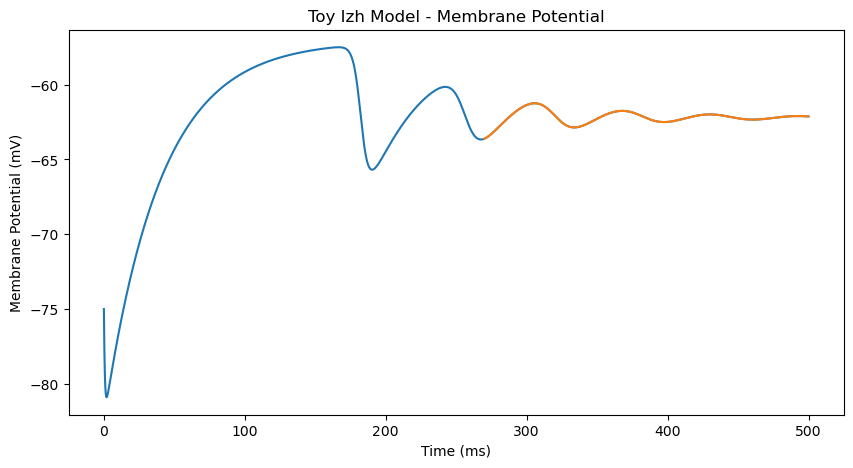

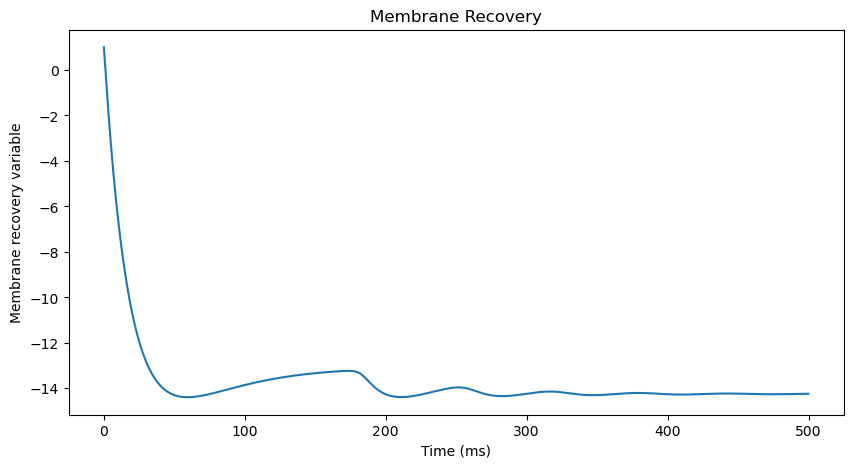

In [11]:
"""
Run the above code for dvdt and dudt functions
"""


# Define variables
# a --- time scale of recovery variable u. smaller values of a => slower recovery. typically a=0.02
# b --- sensitivity of recovery variable u to subthreshold fluctuations of membrane potential v
# c --- after-spike reset value of membrane potential v caused by fast high-threshold K+ conductances. typically c=-65mV
# d --- after-spike reset value of recovery variable u caused by slow high-threshold Na+ and K+ conductances. typically d=2

I=2         # injected current
a=0.05       # 0.02
b=0.229060592875856
c=-70       # -65 mV
d=2         # 2
t_sim=500   # simulation time
dt=0.1      # time step


# Initialize t, u, v arrays
t_values=np.arange(0, t_sim, dt)  # times
u_values=np.zeros(t_values.size)  # empty array of membrane recovery values
v_values=np.zeros(t_values.size)  # empty array of voltages
v_values[0]=-75                   # initial voltage (mV)
u_values[0]=1                     # initial membrane recovery value


# Build arrays of voltages and membrane recovery values.
for i in range(t_values.size - 1):

    if v_values[i]>=30:                # if v>=30 mV, => reset s.t. (v = c) and (u = u+d)
        v_values[i] = c
        u_values[i] = u_values[i]+d
    
    else:
        dv = dvdt(v_values[i], u_values[i], I)
        du = dudt(a, b, v_values[i], u_values[i])
        v_values[i+1] = (v_values[i] + dv*dt)
        u_values[i+1] = (u_values[i] + du*dt)

print("This model doesn't spike")

# Plot voltage trace
plt.figure(figsize=(10,5))
plt.plot(t_values, v_values)
plt.plot(t_values[2700:], v_values[2700:])
plt.title("Toy Izh Model - Membrane Potential")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t_values, u_values)
plt.title("Membrane Recovery")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane recovery variable")
plt.show()


---

### Izh again - messing with parameters to try to create a spiking model

https://www.izhikevich.org/publications/spikes.pdf

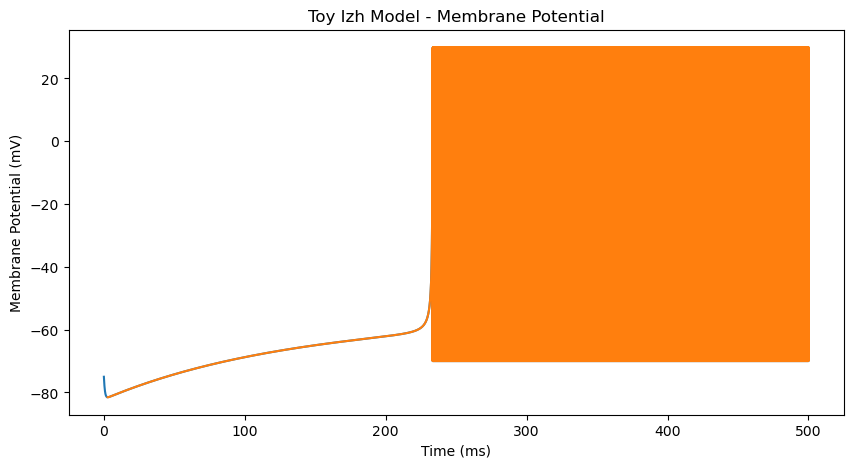

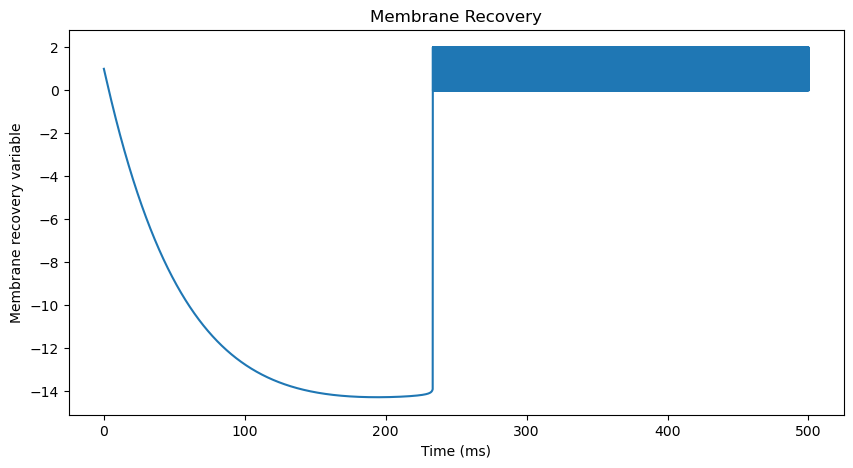

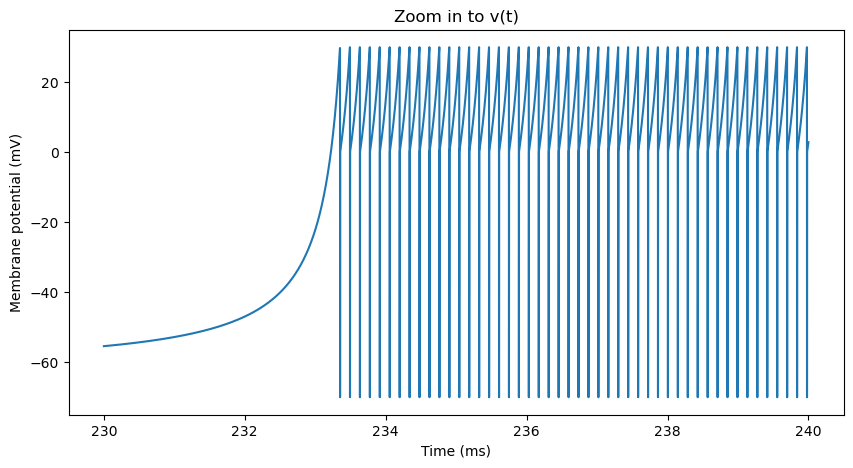

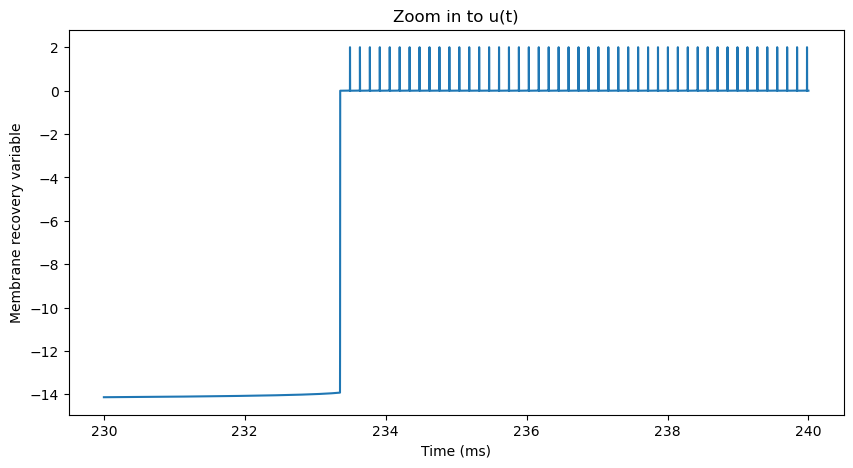

In [14]:
"""
Run the above code for dvdt and dudt functions
"""


# Define variables
# a --- time scale of recovery variable u. smaller values of a => slower recovery. typically a=0.02
# b --- sensitivity of recovery variable u to subthreshold fluctuations of membrane potential v
# c --- after-spike reset value of membrane potential v caused by fast high-threshold K+ conductances. typically c=-65mV
# d --- after-spike reset value of recovery variable u caused by slow high-threshold Na+ and K+ conductances. typically d=2

I=2         # injected current
a=.015       # 0.02
b=0.229060592875856
c=-70       # -65 mV
d=2         # 2
t_sim=500   # simulation time
dt=0.001      # time step


# Initialize t, u, v arrays
t_values=np.arange(0, t_sim, dt)  # times
u_values=np.zeros(t_values.size)  # empty array of membrane recovery values
v_values=np.zeros(t_values.size)  # empty array of voltages
v_values[0]=-75                   # initial voltage (mV)
u_values[0]=1                     # initial membrane recovery value


# Build arrays of voltages and membrane recovery values.
for i in range(t_values.size - 1):

    if v_values[i]>=30:                # if v>=30 mV, => reset s.t. (v = c) and (u = u+d)
        v_values[i] = c
        u_values[i] = u_values[i]+d
    
    else:
        dv = dvdt(v_values[i], u_values[i], I)
        du = dudt(a, b, v_values[i], u_values[i])
        v_values[i+1] = (v_values[i] + dv*dt)
        u_values[i+1] = (u_values[i] + du*dt)

# Plot voltage trace
plt.figure(figsize=(10,5))
plt.plot(t_values, v_values)
plt.plot(t_values[2700:], v_values[2700:])
plt.title("Toy Izh Model - Membrane Potential")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t_values, u_values)
plt.title("Membrane Recovery")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane recovery variable")
plt.show()


# Zoom in
plt.figure(figsize=(10,5))
plt.plot(t_values[230000:240000], v_values[230000:240000])
plt.title("Zoom in to v(t)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t_values[230000:240000], u_values[230000:240000])
plt.title("Zoom in to u(t)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane recovery variable")
plt.show()